In [117]:
import cv2
import sys
import shutil
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import multiprocessing as mp
import face_recognition
from cvloop import cvloop
import zipfile

from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
with zipfile.ZipFile('/home/ubuntu/videos/ck_database.zip', 'r') as zip_ref:
    zip_ref.extractall('/home/ubuntu/videos/')

In [3]:
train_data_gen=ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2 ,
                                  height_shift_range=0.2,
                                  shear_range=0.2, 
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

val_data_gen=ImageDataGenerator(rescale=1./255)

In [21]:
train_dir='/home/ubuntu/videos/ck_dataset/training/'
val_dir='/home/ubuntu/videos/ck_dataset/testing/'

In [122]:
train_gen=train_data_gen.flow_from_directory(train_dir,target_size=(150,150),batch_size=64,class_mode='categorical')
val_gen=val_data_gen.flow_from_directory(val_dir,target_size=(150,150),batch_size=64,class_mode='categorical')

Found 1065 images belonging to 7 classes.
Found 118 images belonging to 7 classes.


# Neural Network

In [6]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',
                        input_shape=(150,150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

W0731 06:19:25.299946 140291519358720 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/video_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0731 06:19:25.316340 140291519358720 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/video_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0731 06:19:25.319229 140291519358720 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/video_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0731 06:19:25.336433 140291519358720 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/video_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool 

In [7]:
model.compile(optimizer='adadelta',loss='categorical_crossentropy',metrics=['accuracy'])

W0731 06:19:48.602098 140291519358720 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/video_env/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0731 06:19:48.622143 140291519358720 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/video_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
history = model.fit_generator(train_gen,steps_per_epoch=100,epochs=150,validation_data=val_gen,validation_steps=50)

W0731 06:19:57.733152 140291519358720 deprecation.py:323] From /home/ubuntu/anaconda3/envs/video_env/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0731 06:19:57.888740 140291519358720 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/video_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/150
100/100 [==============================] - 99s 992ms/step - loss: 1.9523 - acc: 0.2277 - val_loss: 1.9684 - val_acc: 0.1186
Epoch 2/150
100/100 [==============================] - 96s 962ms/step - loss: 1.8162 - acc: 0.2573 - val_loss: 2.0572 - val_acc: 0.1695
Epoch 3/150
100/100 [==============================] - 96s 959ms/step - loss: 1.7954 - acc: 0.2586 - val_loss: 1.9226 - val_acc: 0.1780
Epoch 4/150
100/100 [==============================] - 96s 961ms/step - loss: 1.7561 - acc: 0.2790 - val_loss: 2.0111 - val_acc: 0.1441
Epoch 5/150
100/100 [==============================] - 96s 961ms/step - loss: 1.7308 - acc: 0.2922 - val_loss: 2.1064 - val_acc: 0.1864
Epoch 6/150
100/100 [==============================] - 96s 957ms/step - loss: 1.7129 - acc: 0.2993 - val_loss: 2.0491 - val_acc: 0.2542
Epoch 7/150
100/100 [==============================] - 96s 964ms/step - loss: 1.6980 - acc: 0.3136 - val_loss: 2.1028 - val_acc: 0.3051
Epoch 8/150
100/100 [===========================

Epoch 61/150
100/100 [==============================] - 96s 961ms/step - loss: 0.4785 - acc: 0.8248 - val_loss: 1.7446 - val_acc: 0.7034
Epoch 62/150
100/100 [==============================] - 96s 959ms/step - loss: 0.5031 - acc: 0.8099 - val_loss: 1.8312 - val_acc: 0.7373
Epoch 63/150
100/100 [==============================] - 97s 966ms/step - loss: 0.5017 - acc: 0.8133 - val_loss: 1.7243 - val_acc: 0.6949
Epoch 64/150
100/100 [==============================] - 96s 963ms/step - loss: 0.4531 - acc: 0.8292 - val_loss: 1.6736 - val_acc: 0.6949
Epoch 65/150
100/100 [==============================] - 96s 961ms/step - loss: 0.4899 - acc: 0.8156 - val_loss: 2.0955 - val_acc: 0.6695
Epoch 66/150
100/100 [==============================] - 96s 962ms/step - loss: 0.4360 - acc: 0.8355 - val_loss: 1.4793 - val_acc: 0.7119
Epoch 67/150
100/100 [==============================] - 96s 961ms/step - loss: 0.4783 - acc: 0.8233 - val_loss: 1.4349 - val_acc: 0.7288
Epoch 68/150
100/100 [===================

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               10616960  
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
__________

In [10]:
train_loss=history.history['loss']
train_acc=history.history['acc']
val_loss=history.history['val_loss']
val_acc=history.history['val_acc']

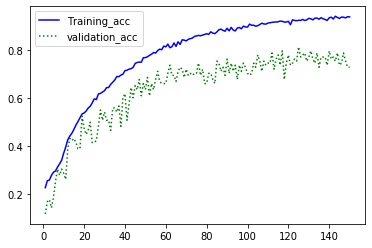

In [11]:
epochs=range(1,len(train_loss)+1)
plt.plot(epochs,train_acc,'-',color='blue')
plt.plot(epochs,val_acc,':',color='green')
plt.legend(['Training_acc','validation_acc'])
plt.show()

In [14]:
model.save('emotion_detection_with_conv_model1.h5')

In [123]:
test_data_gen=ImageDataGenerator(rescale=1./255)

In [124]:
test_dir='/home/ubuntu/videos/ck_dataset/testing/'

In [136]:
# Make sure you use ***** shuffle=False ***** in your test generator
# and reset it using validation_generator.reset() before you make your predictions.
test_gen=test_data_gen.flow_from_directory(test_dir,target_size=(150,150),batch_size=64,class_mode='categorical',shuffle=False)

Found 118 images belonging to 7 classes.


In [137]:
test_gen.reset()

In [138]:
actual_labels=test_gen.classes
actual_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6], dtype=int32)

In [139]:
nb_samples = len(test_gen.filenames) 
nb_samples

118

In [140]:
preds=model.predict_generator(test_gen,steps=nb_samples/64)  #steps=total_sample/batch_size
len(preds)

118

In [141]:
pred_labels=[pred.argmax() for pred in preds] 
print(pred_labels)

[0, 0, 0, 1, 1, 1, 0, 0, 6, 6, 0, 0, 0, 0, 2, 2, 2, 1, 1, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 6, 6, 6, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 4, 0, 0, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 5, 2, 2, 5, 5]


In [142]:
print("classification report: ")
print(classification_report(actual_labels,pred_labels))

classification report: 
              precision    recall  f1-score   support

           0       0.75      0.53      0.62        17
           1       0.79      0.79      0.79        14
           2       0.38      0.30      0.33        10
           3       0.79      0.90      0.84        21
           4       1.00      0.33      0.50         9
           5       0.88      1.00      0.94        22
           6       0.59      0.76      0.67        25

    accuracy                           0.73       118
   macro avg       0.74      0.66      0.67       118
weighted avg       0.74      0.73      0.72       118



In [143]:
print("confusion matrix: ")
print(confusion_matrix(actual_labels,pred_labels))

confusion matrix: 
[[ 9  3  3  0  0  0  2]
 [ 0 11  0  1  0  0  2]
 [ 0  0  3  4  0  0  3]
 [ 0  0  0 19  0  0  2]
 [ 2  0  0  0  3  0  4]
 [ 0  0  0  0  0 22  0]
 [ 1  0  2  0  0  3 19]]
